# Imports

In [1]:
import pandas as pd
import numpy as np

# Load the data

In [2]:
pubs = pd.read_csv('open_pubs.csv')
districts_en = pd.read_csv('districts_en.csv')
old_districts_en = pd.read_csv('old_districts_en.csv')
districts_wales = pd.read_csv('districts_wales.csv')
districts_scott = pd.read_csv('districts_scott.csv')

In [3]:
len(pubs)

51552

In [3]:
pubs.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,fas_id,name,address,...,latitude,longitude,local_authority,population,population.1,population.1.1,population.1.1.1,population.1.1.1.1,population.1.1.1.1.1,population.1.1.1.1.1.1
0,0,0,0,0,0,0,0,24,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER, E...",...,51.97039,0.979328,Babergh,92036,92036,92036,92036,92036,92036,92036
1,1,1,1,1,1,1,1,30,Angel Inn,"Egremont Street, Glemsford, SUDBURY, Suffolk",...,52.094427,0.668408,Babergh,92036,92036,92036,92036,92036,92036,92036
2,2,2,2,2,2,2,2,63,Black Boy Hotel,"7 Market Hill, SUDBURY, Suffolk",...,52.038683,0.730226,Babergh,92036,92036,92036,92036,92036,92036,92036
3,3,3,3,3,3,3,3,64,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER, E...",...,51.966211,0.972091,Babergh,92036,92036,92036,92036,92036,92036,92036
4,4,4,4,4,4,4,4,65,Black Lion,"Lion Road, Glemsford, SUDBURY, Suffolk",...,52.102815,0.666893,Babergh,92036,92036,92036,92036,92036,92036,92036


In [4]:
districts = pd.concat([districts_en, districts_wales, districts_scott], ignore_index = True)

In [5]:
districts.head()

,District,Population
0,Adur,64301
1,Allerdale,97761
2,Amber Valley,128147
3,Arun,160758
4,Ashfield,127918


# Small cleaning of pubs

It appears that there is a problem with two of the entries. More precisely with the way their names are written in the CSV file. We need to clean those two entries.

Here is the original cleaning that was done. Afterwards, the data was cleaned by hand as there were some issue that pandas could not detect.

In [6]:
pubs.isna().sum()

Unnamed: 0                0
Unnamed: 0.1              0
Unnamed: 0.1.1            0
Unnamed: 0.1.1.1          0
Unnamed: 0.1.1.1.1        0
Unnamed: 0.1.1.1.1.1      0
Unnamed: 0.1.1.1.1.1.1    0
fas_id                    0
name                      0
address                   0
postcode                  0
easting                   0
northing                  0
latitude                  0
longitude                 0
local_authority           0
population                0
population.1              0
population.1.1            0
population.1.1.1          0
population.1.1.1.1        0
population.1.1.1.1.1      0
population.1.1.1.1.1.1    0
dtype: int64

In [7]:
pubs[pubs['local_authority'].isna()]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,fas_id,name,address,...,latitude,longitude,local_authority,population,population.1,population.1.1,population.1.1.1,population.1.1.1.1,population.1.1.1.1.1,population.1.1.1.1.1.1


In [8]:
pubs.loc[[768, 43212], ['local_authority', 'longitude', 'latitude', 'northing', 'easting', 'postcode']] = pubs.loc[[768, 43212], ['longitude', 'latitude', 'northing', 'easting', 'postcode', 'address']].values

In [9]:
pubs.loc[[768, 43212], ['name', 'address']] = np.array([x.split(',', 1) for x in pubs.loc[[768, 43212]].name.values])

ValueError: Must have equal len keys and value when setting with an ndarray

In [10]:
pubs.loc[[768, 43212], 'address'] = pubs.loc[[768, 43212], 'address'].str[1:]

In [11]:
pubs.loc[[768, 43212]]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,fas_id,name,address,...,latitude,longitude,local_authority,population,population.1,population.1.1,population.1.1.1,population.1.1.1.1,population.1.1.1.1.1,population.1.1.1.1.1.1
768,768,769,770,771,772,773,774,6247,The Chough Public House,"he Chough, 18 Eastham Crescent, Brentwood, Essex",...,193012,51.612838,0.32799,77021,77021,77021,77021,77021,77021,77021
43212,43212,43214,43216,43218,43220,43222,43224,407015,The Rodley Barge,"82 - 184 Town Street, Rodley, Leeds",...,436293,53.822431,-1.657901,793139,793139,793139,793139,793139,793139,793139


# Quick look at the intersection between our datasets

In [12]:
print(len(pubs.local_authority.unique()))

361


In [13]:
print(len(districts))

363


In [14]:
print(len(np.intersect1d(districts.District.unique(), pubs.local_authority.unique())))

355


In [15]:
print(len(np.intersect1d(old_districts_en.District.unique(), pubs.local_authority.unique())))

1


In [16]:
pubs['local_authority'] = pubs['local_authority'].replace({x: y for (x, y) in old_districts_en.values})

In [17]:
districts[~districts['District'].isin(pubs.local_authority.unique())]

,District,Population
153,Malvern Hills,78698
164,Milton Keynes,269457
317,Neath Port Talbot †,144386
322,Gwynedd *,125171
323,Conwy ‡,118184
327,Ceredigion §,72895
329,Blaenau Gwent,70020
354,Stirling,94330
361,Shetland,22990


In [18]:
districts.loc[[317, 322, 323, 327], 'District'] = districts.loc[[317, 322, 323, 327], 'District'].apply(lambda x: x[:-2])

In [19]:
districts[~districts['District'].isin(pubs.local_authority.unique())]

,District,Population
153,Malvern Hills,78698
164,Milton Keynes,269457
329,Blaenau Gwent,70020
354,Stirling,94330
361,Shetland,22990


In [20]:
for x in districts[~districts['District'].isin(pubs.local_authority.unique())].District.values :
    print(x)
    print(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique())

Malvern Hills
['Herefordshire and Malvern Hills']
Milton Keynes
[]
Blaenau Gwent
[]
Stirling
[]
Shetland
[]


In [21]:
pubs[pubs['local_authority'] == 'St. Helens'].head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,fas_id,name,address,...,latitude,longitude,local_authority,population,population.1,population.1.1,population.1.1.1,population.1.1.1.1,population.1.1.1.1.1,population.1.1.1.1.1.1


In [22]:
pubs[pubs['local_authority'] == 'Na h-Eileanan Siar'].head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,fas_id,name,address,...,latitude,longitude,local_authority,population,population.1,population.1.1,population.1.1.1,population.1.1.1.1,population.1.1.1.1.1,population.1.1.1.1.1.1


In [23]:
# More datascraping lead to the conclusion that Buckinghamshire is separated into these 5 subdistricts.
for x in ['South Bucks', 'Chiltern', 'Wycombe', 'Aylesbury Vale', 'Milton Keynes'] :
    print(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique())

[]
[]
[]
[]
[]


In [24]:
to_replace = {}
for x in districts[~districts['District'].isin(pubs.local_authority.unique())].District.values :
    if(len(pubs[pubs['local_authority'].str.contains(x)].local_authority.unique()) > 0) :
        to_replace[pubs[pubs['local_authority'].str.contains(x)].local_authority.unique()[0]] = x
to_replace['St. Helens'] = 'St Helens'
to_replace['Na h-Eileanan Siar'] = 'Na h-Eileanan Siar (Western Isles)'
to_replace['Shepway'] = 'Folkestone and Hythe'
for x in ['South Bucks', 'Chiltern', 'Wycombe', 'Aylesbury Vale', 'Milton Keynes'] : 
    to_replace[x] = 'Buckinghamshire'

In [25]:
pubs['local_authority'] = pubs['local_authority'].replace(to_replace)

In [26]:
pubs[~pubs['local_authority'].isin(districts.District.unique())].local_authority.unique()

array(['0.32799', '-1.657901'], dtype=object)

In [27]:
pubs = pd.merge(pubs, districts, left_on = 'local_authority', right_on = 'District')

In [28]:
pubs.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,fas_id,name,address,...,local_authority,population,population.1,population.1.1,population.1.1.1,population.1.1.1.1,population.1.1.1.1.1,population.1.1.1.1.1.1,District,Population
0,0,0,0,0,0,0,0,24,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER, E...",...,Babergh,92036,92036,92036,92036,92036,92036,92036,Babergh,92036


In [29]:
pubs = pubs.drop(columns = 'District').rename(columns = {'Population' : 'population'})

In [30]:
pubs.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,fas_id,name,address,...,longitude,local_authority,population,population.1,population.1.1,population.1.1.1,population.1.1.1.1,population.1.1.1.1.1,population.1.1.1.1.1.1,population
0,0,0,0,0,0,0,0,24,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER, E...",...,0.979328,Babergh,92036,92036,92036,92036,92036,92036,92036,92036


In [31]:
pubs.to_csv('open_pubs.csv') 

In [32]:
districts.to_csv('districts.csv')

# EDA

In [33]:
print(len(pubs['local_authority'].unique()))

359


In [34]:
print(len(pubs))

51552


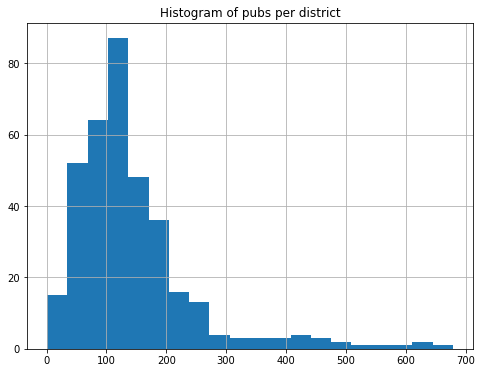

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.title('Histogram of pubs per district')
pubs.groupby('local_authority').size().hist(bins = 20)
plt.savefig('Hist1.png')

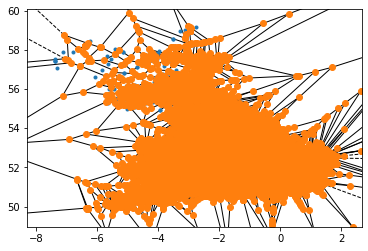

In [113]:
fig = voronoi_plot_2d(vor)
plt.show()

In [116]:
vor.vertices

array([[-2438.75534536,  -275.82128404],
       [   -7.05427618,    57.56272085],
       [   -9.79715542,    53.12025966],
       ...,
       [   -2.98590465,    53.40659239],
       [   -2.98693393,    53.40619251],
       [   -2.9868895 ,    53.406311  ]])

In [115]:
#Suppressing the vertices that are not in england
#Find bounding box for england
#Need to further check the point lie in england

In [117]:
vor.vertices = vor.vertices[np.where(vor.vertices[:,1] > 35) and np.where(vor.vertices[:,1] < 60)]
vor.vertices = vor.vertices[np.where(vor.vertices[:,0] > 0) and np.where(vor.vertices[:,1] < 3)]

In [118]:
len(vor.vertices)

94296

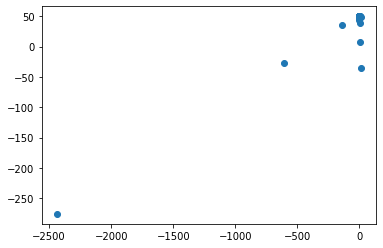

In [96]:
plt.scatter(x=vor.vertices[:,0], y = vor.vertices[:,1])

In [97]:
len(vor.vertices)

69